# **Importing Modules and Data**

In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import tree
from sklearn import linear_model
from matplotlib import pyplot as plt
from matplotlib_venn import venn2
import seaborn as sns
from sklearn.model_selection import KFold
#from sklearn.cross_validation import StratifiedKFold
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn import metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error, median_absolute_error, explained_variance_score, r2_score
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import seaborn as sb
import sklearn
from pandas import Series, DataFrame
from pylab import rcParams
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import Perceptron
import scipy
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn import metrics
from sklearn.svm import SVC
from sklearn.decomposition import PCA as RandomizedPCA
from sklearn.pipeline import make_pipeline

In [26]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [67]:
MovieData = '/content/drive/MyDrive/DS310/IMDBNetflix.csv'

In [27]:
df = pd.read_csv('MovieData.csv')
df = df.dropna()
df.head()

,Movie,Year,Director,Cast,Imdb_genre,IMDB Rating,time_minute,Votes
0,Hot Rod,2007,Akiva Schaffer,"Andy Samberg, Jorma Taccone, Bill Hader, Danny...",Comedy,6.7,88,84956.0
1,Game Night,2018,John Francis Daley,"Jason Bateman, Rachel McAdams, Kyle Chandler, ...",Comedy,6.9,100,229292.0
2,The First Wives Club,1996,Hugh Wilson,"Goldie Hawn, Bette Midler, Diane Keaton, Maggi...",Comedy,6.4,103,48413.0
3,Scary Movie,2000,Keenen Ivory Wayans,"Shawn Wayans, Marlon Wayans, Cheri Oteri, Shan...",Comedy,6.2,88,254927.0
4,Blockers,2018,Kay Cannon,"Leslie Mann, Ike Barinholtz, John Cena, Kathry...",Comedy,6.2,102,78498.0


# **Data Visualization/EDA**

Text(0.5, 0, 'Year')

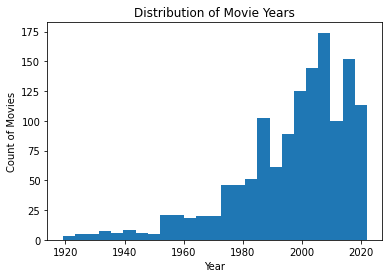

In [4]:
df.Year.plot.hist(bins=25)
plt.title("Distribution of Movie Years")
plt.ylabel('Count of Movies')
plt.xlabel('Year')

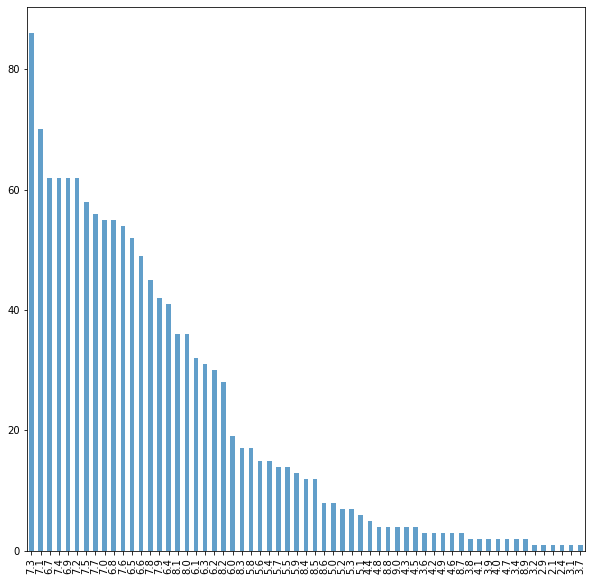

In [5]:
df['IMDB Rating'].value_counts().plot(kind='bar',alpha=0.7,figsize=(10,10))
plt.show()

# **Pre-Processing**

## **Checking for Missing Values**

In [29]:
df.isna().sum()

Movie          0
Year           0
Director       0
Cast           0
Imdb_genre     0
IMDB Rating    0
time_minute    0
Votes          0
dtype: int64

## **Dealing with Cast Feature**

In [107]:
df1 = df['Cast'].str.split(",", expand=True)
df1

,0,1,2,3,4,5,6,7,8,9,...,28,29,30,31,32,33,34,35,36,37
0,Andy Samberg,Jorma Taccone,Bill Hader,Danny R. McBride,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1,Jason Bateman,Rachel McAdams,Kyle Chandler,Sharon Horgan,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
2,Goldie Hawn,Bette Midler,Diane Keaton,Maggie Smith,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
3,Shawn Wayans,Marlon Wayans,Cheri Oteri,Shannon Elizabeth,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
4,Leslie Mann,Ike Barinholtz,John Cena,Kathryn Newton,None,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708,Pam Dawber,Michael Nouri,Bess Meyer,Peter Berg,James Handy,Kyle Chandler,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1709,Nancy McKeon,Valerie Harper,Stephen Macht,Tricia Leigh Fisher,Millie Perkins,None,None,None,None,None,...,None,None,None,None,None,None,None,None,None,None
1710,Judith Light,Lukas Haas,Michael Bowen,Nikki Cox,George Dzundza,Valerie Landsburg,Sarah Jessica Parker,Mitchell Ryan,None,None,...,None,None,None,None,None,None,None,None,None,None
1711,Ricky Schroder,Jon DeVries,Debra Mooney,Mary-Louise Parker,Christopher Curry,Rick Warner,Tom Wood,None,None,None,...,None,None,None,None,None,None,None,None,None,None


In [108]:
df2 = df1.drop(df1.columns[[4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37]],axis = 1)
df3 = df.join(df2)
df3 = df3.rename(columns={0: 'Cast1', 1:'Cast2', 2:'Cast3', 3:'Cast4'})
df4 = df3.drop(['Cast'], axis=1)
df4



,Movie,Year,Director,Imdb_genre,IMDB Rating,time_minute,Votes,Cast1,Cast2,Cast3,Cast4
0,Hot Rod,2007,Akiva Schaffer,Comedy,6.7,88,84956.0,Andy Samberg,Jorma Taccone,Bill Hader,Danny R. McBride
1,Game Night,2018,John Francis Daley,Comedy,6.9,100,229292.0,Jason Bateman,Rachel McAdams,Kyle Chandler,Sharon Horgan
2,The First Wives Club,1996,Hugh Wilson,Comedy,6.4,103,48413.0,Goldie Hawn,Bette Midler,Diane Keaton,Maggie Smith
3,Scary Movie,2000,Keenen Ivory Wayans,Comedy,6.2,88,254927.0,Shawn Wayans,Marlon Wayans,Cheri Oteri,Shannon Elizabeth
4,Blockers,2018,Kay Cannon,Comedy,6.2,102,78498.0,Leslie Mann,Ike Barinholtz,John Cena,Kathryn Newton
...,...,...,...,...,...,...,...,...,...,...,...
1708,Quiet Victory: The Charlie Wedemeyer Story,1988,Roy Campanella II,Drama,7.2,93 min,146.0,Pam Dawber,Michael Nouri,Bess Meyer,Peter Berg
1709,Strange Voices,1987,Arthur Allan Seidelman,Drama,6.3,96 min,374.0,Nancy McKeon,Valerie Harper,Stephen Macht,Tricia Leigh Fisher
1710,The Ryan White Story,1989,John Herzfeld,"Biography,Drama",7.2,94 min,882.0,Judith Light,Lukas Haas,Michael Bowen,Nikki Cox
1711,Too Young the Hero,1988,Buzz Kulik,"Biography,Drama,War",6.7,94 min,513.0,Ricky Schroder,Jon DeVries,Debra Mooney,Mary-Louise Parker


## **Dealing with the Genre Feature**

In [137]:
df5 = df4['Imdb_genre'].str.split(",", expand=True)
df5
df6 = df5.drop(df5.columns[[1,2]], axis = 1)
dfgen = df6.join(df4)
dfgen = dfgen.rename(columns={0:"Genre"})
dfgen = dfgen.drop(['Imdb_genre'], axis=1)
dfgen


,Genre,Movie,Year,Director,IMDB Rating,time_minute,Votes,Cast1,Cast2,Cast3,Cast4
0,Comedy,Hot Rod,2007,Akiva Schaffer,6.7,88,84956.0,Andy Samberg,Jorma Taccone,Bill Hader,Danny R. McBride
1,Comedy,Game Night,2018,John Francis Daley,6.9,100,229292.0,Jason Bateman,Rachel McAdams,Kyle Chandler,Sharon Horgan
2,Comedy,The First Wives Club,1996,Hugh Wilson,6.4,103,48413.0,Goldie Hawn,Bette Midler,Diane Keaton,Maggie Smith
3,Comedy,Scary Movie,2000,Keenen Ivory Wayans,6.2,88,254927.0,Shawn Wayans,Marlon Wayans,Cheri Oteri,Shannon Elizabeth
4,Comedy,Blockers,2018,Kay Cannon,6.2,102,78498.0,Leslie Mann,Ike Barinholtz,John Cena,Kathryn Newton
...,...,...,...,...,...,...,...,...,...,...,...
1708,Drama,Quiet Victory: The Charlie Wedemeyer Story,1988,Roy Campanella II,7.2,93 min,146.0,Pam Dawber,Michael Nouri,Bess Meyer,Peter Berg
1709,Drama,Strange Voices,1987,Arthur Allan Seidelman,6.3,96 min,374.0,Nancy McKeon,Valerie Harper,Stephen Macht,Tricia Leigh Fisher
1710,Biography,The Ryan White Story,1989,John Herzfeld,7.2,94 min,882.0,Judith Light,Lukas Haas,Michael Bowen,Nikki Cox
1711,Biography,Too Young the Hero,1988,Buzz Kulik,6.7,94 min,513.0,Ricky Schroder,Jon DeVries,Debra Mooney,Mary-Louise Parker


In [138]:
genre_dummy = pd.get_dummies(dfgen['Genre'])
dfgen = dfgen.join(genre_dummy)
dfgen = dfgen.drop(['Genre'], axis=1)
dfgen

,Movie,Year,Director,IMDB Rating,time_minute,Votes,Cast1,Cast2,Cast3,Cast4,...,Documentary,Drama,Family,Fantasy,Horror,Musical,Mystery,Sci-Fi,Thriller,Western
0,Hot Rod,2007,Akiva Schaffer,6.7,88,84956.0,Andy Samberg,Jorma Taccone,Bill Hader,Danny R. McBride,...,0,0,0,0,0,0,0,0,0,0
1,Game Night,2018,John Francis Daley,6.9,100,229292.0,Jason Bateman,Rachel McAdams,Kyle Chandler,Sharon Horgan,...,0,0,0,0,0,0,0,0,0,0
2,The First Wives Club,1996,Hugh Wilson,6.4,103,48413.0,Goldie Hawn,Bette Midler,Diane Keaton,Maggie Smith,...,0,0,0,0,0,0,0,0,0,0
3,Scary Movie,2000,Keenen Ivory Wayans,6.2,88,254927.0,Shawn Wayans,Marlon Wayans,Cheri Oteri,Shannon Elizabeth,...,0,0,0,0,0,0,0,0,0,0
4,Blockers,2018,Kay Cannon,6.2,102,78498.0,Leslie Mann,Ike Barinholtz,John Cena,Kathryn Newton,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708,Quiet Victory: The Charlie Wedemeyer Story,1988,Roy Campanella II,7.2,93 min,146.0,Pam Dawber,Michael Nouri,Bess Meyer,Peter Berg,...,0,1,0,0,0,0,0,0,0,0
1709,Strange Voices,1987,Arthur Allan Seidelman,6.3,96 min,374.0,Nancy McKeon,Valerie Harper,Stephen Macht,Tricia Leigh Fisher,...,0,1,0,0,0,0,0,0,0,0
1710,The Ryan White Story,1989,John Herzfeld,7.2,94 min,882.0,Judith Light,Lukas Haas,Michael Bowen,Nikki Cox,...,0,0,0,0,0,0,0,0,0,0
1711,Too Young the Hero,1988,Buzz Kulik,6.7,94 min,513.0,Ricky Schroder,Jon DeVries,Debra Mooney,Mary-Louise Parker,...,0,0,0,0,0,0,0,0,0,0


In [111]:
dfgen.to_csv("FinalMovieData.csv")

# **Continued Data Visualization and Analysis**

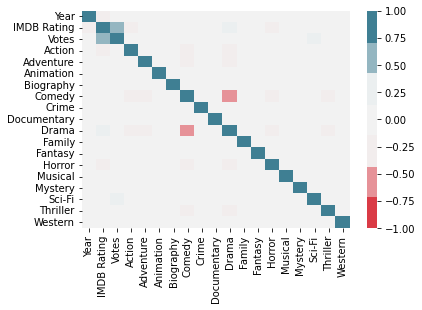

In [113]:
sns.heatmap(dfgen.corr(), vmin=-1, vmax=1, center=0, cmap=sns.diverging_palette(10, 220, sep=80, n=7))


# **Model Building and Hyperparameter Tuning**

In [143]:
dummiescast = pd.get_dummies(dfgen, columns=['Cast1', 'Cast2', 'Cast3', 'Cast4'], drop_first=True)
dummiesdir = pd.get_dummies(dummiescast, columns=['Director'], drop_first=True)
dummiesdir = dummiesdir.drop(['Movie'], axis = 1)
dummiesdir = dummiesdir.drop(['time_minute'], axis = 1)
dummiesdir = dummiesdir.astype({"Year": int, "Votes": int})
dummiesdir



,Year,IMDB Rating,Votes,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,...,Director_Wolf Rilla,Director_Wolfgang Petersen,Director_Wolfgang Reitherman,Director_Woody Allen,Director_Yeon Sang-ho,Director_Zach Braff,Director_Zack Snyder,Director_Zak Hilditch,Director_Zhang Yimou,Director_Éric Valette
0,2007,6.7,84956,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2018,6.9,229292,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1996,6.4,48413,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2000,6.2,254927,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2018,6.2,78498,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1708,1988,7.2,146,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1709,1987,6.3,374,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1710,1989,7.2,882,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1711,1988,6.7,513,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
features = dummiesdir.drop(['IMDB Rating'], axis = 1)
labels = dummiesdir['IMDB Rating']

In [171]:
train, test, train_labels, test_labels = train_test_split(features,labels,test_size=0.33,random_state=42)

## **Model Building and Comparison**

In [172]:
model_lr = LinearRegression(fit_intercept=True)
model_l = linear_model.Lasso()
model_r = linear_model.Ridge()

## **Hyperparameter Setting and Tuning**

In [ ]:
param_grid = {"alpha": np.arange(0, 1.001,.01)}
lasso_gscv = GridSearchCV(model_l,param_grid,cv=5)
ridge_gscv = GridSearchCV(model_r,param_grid,cv=5)
lasso_gscv.fit(train, train_labels)
ridge_gscv.fit(train, train_labels)

In [174]:
best_alpha_l = lasso_gscv.best_params_["alpha"]
best_alpha_r = ridge_gscv.best_params_["alpha"]
print(best_alpha_l)
print(best_alpha_r)

0.01
1.0


In [175]:
model_l = linear_model.Lasso(best_alpha_l)
model_r = linear_model.Ridge(best_alpha_r)

In [176]:
model_lr.fit(train, train_labels)
model_l.fit(train, train_labels)
model_r.fit(train, train_labels)

Ridge()

In [177]:
y_pred_lr = model_lr.predict(test)
y_pred_l = model_l.predict(test)
y_pred_r = model_r.predict(test)

## **Performance Evaluation**

In [178]:
mean_squared_error(test_labels,y_pred_lr )

2.0997825265505967

In [179]:
mean_squared_error(test_labels,y_pred_l )


0.5541179976313837

In [180]:
mean_squared_error(test_labels,y_pred_r )

0.5308080760264955

In [ ]:
best_alpha_r = ridge_gscv.best_params_["alpha"]
model_r = linear_model.Ridge(best_alpha_r)
model_r.fit(train, train_labels)
y_pred_r = model_r.predict(test)
y_pred_r

In [ ]:
data_ridge = {'Movie':df["Movie"][0:445], "IMDB Rating": y_pred_r}
data_ridge

# **Converting to a CSV File**

In [195]:
final_DataFrame_ridge = pd.DataFrame(data = data_ridge)


In [196]:
final_DataFrame_ridge[["Movie", "IMDB Rating"]].to_csv('/content/drive/MyDrive/DS320/FinalProject.csv',index=False)